In [3]:
import os
os.environ["TF_MIN_CPP_LEVEL_LOG"] = "2"
import cv2
import time
import random
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from pathlib import Path

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

tf.__version__

'2.5.0'

In [5]:
DATADIR = '../Dataset'
CATEGORIES = ['AAPitaya','Apple','Banana','Kiwi','Orange','Peach','Pear']
IMG_SIZE = 64

In [6]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
     
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

training_data = create_training_data()

100%|█████████████████████████████████████████████████████████████████████████████| 2151/2151 [00:04<00:00, 441.15it/s]


In [7]:
print(f"data numbers: {len(training_data)}")
random.shuffle(training_data)
#for sample in training_data:
    #print( sample[1],end=" ")

data numbers: 15236


In [8]:
training_data[0][1]

6

In [9]:
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0

Y = np.array(Y)
#X.shape
Y.shape

(15236,)

In [10]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=7, activation = 'softmax')) #unit:分类数量

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.summary()

In [12]:
history = model.fit(X, Y, batch_size=32, epochs=100, validation_split=0.1)
#model.fit_generator(datagen.flow(X, Y, batch_size=32),
                  #epochs=100,
                   #verbose=1)


Epoch 1/100
429/429 [==============================] - 14s 32ms/step - loss: 1.1424 - accuracy: 0.5532 - val_loss: 0.6680 - val_accuracy: 0.7539
Epoch 2/100
429/429 [==============================] - 13s 31ms/step - loss: 0.4785 - accuracy: 0.8213 - val_loss: 0.3144 - val_accuracy: 0.8878
Epoch 3/100
429/429 [==============================] - 14s 32ms/step - loss: 0.2983 - accuracy: 0.8898 - val_loss: 0.1525 - val_accuracy: 0.9495
Epoch 4/100
429/429 [==============================] - 15s 36ms/step - loss: 0.2352 - accuracy: 0.9172 - val_loss: 0.1665 - val_accuracy: 0.9469
Epoch 5/100
429/429 [==============================] - 14s 33ms/step - loss: 0.1662 - accuracy: 0.9398 - val_loss: 0.1563 - val_accuracy: 0.9488
Epoch 6/100
429/429 [==============================] - 13s 31ms/step - loss: 0.1550 - accuracy: 0.9452 - val_loss: 0.1461 - val_accuracy: 0.9508
Epoch 7/100
429/429 [==============================] - 14s 33ms/step - loss: 0.1145 - accuracy: 0.9586 - val_loss: 0.2063 - val_ac

429/429 [==============================] - 13s 31ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.1207 - val_accuracy: 0.9751
Epoch 58/100
429/429 [==============================] - 13s 30ms/step - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.0456 - val_accuracy: 0.9849
Epoch 59/100
429/429 [==============================] - 13s 31ms/step - loss: 0.0304 - accuracy: 0.9916 - val_loss: 0.0353 - val_accuracy: 0.9869
Epoch 60/100
429/429 [==============================] - 13s 31ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0279 - val_accuracy: 0.9915
Epoch 61/100
429/429 [==============================] - 13s 31ms/step - loss: 0.0376 - accuracy: 0.9890 - val_loss: 0.0340 - val_accuracy: 0.9908
Epoch 62/100
429/429 [==============================] - 14s 32ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0280 - val_accuracy: 0.9902
Epoch 63/100
429/429 [==============================] - 14s 34ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0628 - val_accuracy

In [13]:
model.save('../Models/fruit_final_1.h5')

In [14]:
# 单个测试样本数据
test_path = "../Images/test.jpg"
image = cv2.imread(test_path)
image = cv2.resize(image, (64, 64))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_bn = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)
image_bn = np.expand_dims(image_bn, axis=0)

In [15]:
# 恢复 keras 模型，并预测
keras_file = '../Models/fruit_final_1.h5'
model = tf.keras.models.load_model(keras_file)
# model.summary()
# tf.autograph.set_verbosity(0)

start_time = time.time()
pred = model.predict(image_bn)
stop_time = time.time()

print(f"prediction: {pred}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(keras_file)/1024/1024))

prediction: [[0.0000000e+00 0.0000000e+00 4.6143628e-32 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
time: 95.697ms
model size: 7.47 MB


In [16]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

tflite_file = Path("../Models/Tflites/fruit_final_1.tflite")
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Matttt\AppData\Local\Temp\tmpjr6jyegv\assets


657096

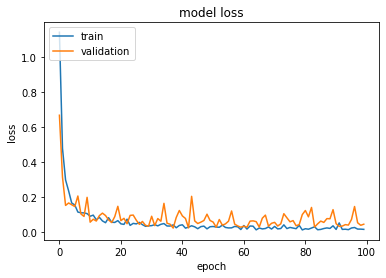

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

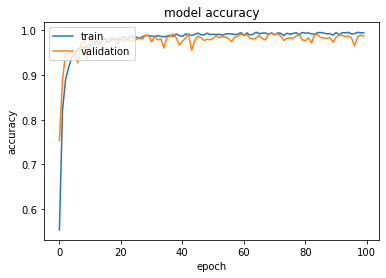

In [18]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
# plot_model(model, to_file='model_small.png', show_layer_names=False, show_shapes=True)

In [20]:
print(X[:100].shape)

(100, 64, 64, 3)


In [21]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [22]:
# tflite 模型推理
tflite_file = Path("../Models/Tflites/fruit_final_1.tflite")
interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(tflite_file)/1024/1024))

prediction: [[  0   0   0   0 255   0   0]]
time: 52.570ms
model size: 0.63 MB
